In [1]:
import pandas as pd
import numpy as np

In [10]:
#Preprocess MA data
from sklearn.preprocessing import MinMaxScaler
MA_complete_df_nonan = pd.read_csv('MA_complete_df_nonan.csv')
community_df = MA_complete_df_nonan['Community']
label = MA_complete_df_nonan['Percentage_>5']
MA_complete_df_nonan.drop('Community',inplace = True, axis = 1 )
MA_complete_df_nonan.drop('Percentage_0-4',inplace = True, axis = 1 )
MA_complete_df_nonan.drop('Percentage_5-9',inplace = True, axis = 1 )
MA_complete_df_nonan.drop('Percentage_10-24',inplace = True, axis = 1 )
MA_complete_df_nonan.drop('Percentage_>5',inplace = True, axis = 1 )
MA_complete_df_nonan.drop('Percentage_>25',inplace = True, axis = 1 )
MA_complete_df_nonan.drop('Unnamed: 0',inplace = True, axis = 1 )
MA_complete_df_nonan.drop('Area in Square Miles',inplace = True, axis = 1 )
MA_complete_df_nonan.drop('Summarized area in Square Miles.1',inplace = True, axis = 1 )
MA_complete_df_nonan.drop('Summarized area in Square Miles.2',inplace = True, axis = 1 )
MA_complete_df_nonan.drop('Total Screened',inplace = True, axis = 1 )
MA_complete_df_nonan.drop('Percent Screened',inplace = True, axis = 1 )
MA_complete_df_nonan.drop('Population 9-47 mo1',inplace = True, axis = 1 )

col_names = MA_complete_df_nonan.columns
scaler = MinMaxScaler()
MA_complete_df_nonan = scaler.fit_transform(MA_complete_df_nonan) 
MA_complete_df_nonan = pd.DataFrame(data = MA_complete_df_nonan, columns = col_names)
MA_complete_df_nonan['Community'] = community_df
MA_complete_df_nonan['label'] = label
MA_complete_df_nonan.to_excel('df.xlsx')
df_MA = MA_complete_df_nonan.copy()

#create features and labels
label = np.where(label >= 1, 1, 0)
label = pd.DataFrame(data = label, columns = ['label'])
features = df_MA.copy()
features.drop('label',inplace = True, axis = 1 )
features.drop('Community',inplace = True, axis = 1 )

In [11]:
MA_complete_df_nonan

,Result,Year,Above 15 ppb,Above 10 ppb,Above 5 ppb,Household_income,Black_income,American_Indian_Income,Asian_income,Hawaiian_income,...,Ratio_households_above_poverty_level,Percent_white,Percent_black,Percent_native_american,Percent_asian,Percent_hawaiian,Percent_hispanic,Percent_Pre-1978_Housing_Units,Community,label
0,0.020708,0.000000,0.096085,0.110940,0.258772,0.465450,1.159948e-09,0.0,1.211337e-01,0.0,...,0.015544,0.894225,0.046641,0.000000,0.120322,0.000000,0.025718,0.568966,ABINGTON,0.0
1,0.071202,0.000000,0.154322,0.219626,0.327939,0.720270,2.944690e-01,0.0,5.954956e-01,0.0,...,0.034620,0.625073,0.044182,0.116573,0.849310,0.154834,0.039594,0.431034,ACTON,1.4
2,0.023218,0.000000,0.020304,0.041025,0.042530,0.409343,0.000000e+00,0.0,1.063411e-10,0.0,...,0.016936,0.891012,0.000513,0.000000,0.061741,0.000000,0.029613,0.655172,ACUSHNET,0.0
3,0.003855,0.000000,0.013442,0.010864,0.046929,0.260289,0.000000e+00,0.0,7.001389e-12,0.0,...,0.007429,0.978711,0.007347,0.039932,0.030355,0.000000,0.009922,1.000000,ADAMS,0.0
4,0.008737,0.500000,0.031186,0.054612,0.101617,0.368230,1.694757e-02,0.0,2.204513e-02,0.0,...,0.020182,0.905402,0.051170,0.042070,0.056746,0.000000,0.055614,0.586207,AGAWAM,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,0.009898,0.038168,0.079355,0.096204,0.135056,0.291982,0.000000e+00,0.0,0.000000e+00,0.0,...,0.012771,0.700938,0.030573,0.000000,0.021986,0.000000,0.109445,0.982759,WINTHROP,1.9
209,0.025834,0.267705,0.081993,0.092272,0.126819,0.453724,1.243087e-01,0.0,4.233701e-01,0.0,...,0.020223,0.731663,0.183595,0.000000,0.294607,0.000000,0.062541,0.620690,WOBURN,1.1
210,0.027830,0.000000,0.087686,0.097295,0.134901,0.279006,1.566925e-01,0.0,2.586776e-01,0.0,...,0.011204,0.564578,0.320299,0.114237,0.279201,0.027313,0.199376,0.793103,WORCESTER,1.5
211,0.014901,0.000000,0.000000,0.050817,0.087803,0.063226,2.720816e-12,0.0,0.000000e+00,0.0,...,0.003042,0.179548,0.007091,0.000000,0.007619,0.000000,0.006311,0.551724,WORTHINGTON,0.0


In [12]:
##############################################################################################
#Table 1 - using 5 machine learning models to predict Pb blood levels 

##############################################################################################

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

#shuffle data
features, label = shuffle(features,label)

#initialize models:
logit_model = LogisticRegression()
tree_model = tree.DecisionTreeClassifier()
rf = RandomForestClassifier()
svm_model = SVC(probability=True)
knn_model = KNeighborsClassifier()

#cross validation
scoring = {'roc_auc': 'roc_auc',
           'f1': 'f1',
           'precision': 'precision',
           'recall': 'recall'}

logit_model_cv = cross_validate(logit_model, features, label.values.ravel(), cv=5, scoring=scoring)
tree_model_cv = cross_validate(tree_model, features, label.values.ravel(), cv=5, scoring=scoring)
rf_cv = cross_validate(rf, features, label.values.ravel(), cv=5, scoring=scoring)
svm_model_cv = cross_validate(svm_model, features, label.values.ravel(), cv=5, scoring=scoring)
knn_model_cv = cross_validate(knn_model, features, label.values.ravel(), cv=5, scoring=scoring)

#store metrics
#ROC AUC
logit_roc_auc = logit_model_cv['test_roc_auc'].mean()
logit_roc_auc_std = logit_model_cv['test_roc_auc'].std()
tree_roc_auc = tree_model_cv['test_roc_auc'].mean()
tree_roc_auc_std = tree_model_cv['test_roc_auc'].std()
rf_roc_auc = rf_cv['test_roc_auc'].mean()
rf_roc_auc_std = rf_cv['test_roc_auc'].std()
svm_roc_auc = svm_model_cv['test_roc_auc'].mean()
svm_roc_auc_std = svm_model_cv['test_roc_auc'].std()
knn_roc_auc = knn_model_cv['test_roc_auc'].mean()
knn_roc_auc_std = knn_model_cv['test_roc_auc'].std()

#F1
logit_f1 = logit_model_cv['test_f1'].mean()
logit_f1_std = logit_model_cv['test_f1'].std()
tree_f1 = tree_model_cv['test_f1'].mean()
tree_f1_std = tree_model_cv['test_f1'].std()
rf_f1 = rf_cv['test_f1'].mean()
rf_f1_std = rf_cv['test_f1'].std()
svm_f1 = svm_model_cv['test_f1'].mean()
svm_f1_std = svm_model_cv['test_f1'].std()
knn_f1 = knn_model_cv['test_f1'].mean()
knn_f1_std = knn_model_cv['test_f1'].std()

# Model comparison
models = pd.DataFrame({
    'Model'    : ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'kNN'],
    'F1'       : [logit_f1, tree_f1, rf_f1, svm_f1, knn_f1],
    'F1 std' : [logit_f1_std, tree_f1_std, rf_f1_std, svm_f1_std, knn_f1_std],
    'ROC AUC'       : [logit_roc_auc, tree_roc_auc, rf_roc_auc, svm_roc_auc, knn_roc_auc],
    'ROC AUC std':[logit_roc_auc_std, tree_roc_auc_std, rf_roc_auc_std, svm_roc_auc_std, knn_roc_auc_std]
    })
models = models.sort_values(by='F1', ascending=False)
models

,Model,F1,F1 std,ROC AUC,ROC AUC std
2,Random Forest,0.675826,0.046968,0.882841,0.049328
4,kNN,0.665146,0.060613,0.868835,0.041997
3,SVM,0.599086,0.081015,0.897500,0.015474
1,Decision Tree,0.576704,0.030606,0.721193,0.016268
0,Logistic Regression,0.497964,0.118790,0.853580,0.018213


In [ ]:
models.to_excel('Table 1 MA .xlsx')

In [13]:
##############################################################################################
#Random forest model - predicts whether over 1% of children in a community will 
#have lead blood levels exceeding 5 ug/dL based on socioeconomic and water quality 
#data from schools
##############################################################################################
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.utils import shuffle

rf = RandomForestClassifier(n_estimators = 500, random_state = 42, criterion='entropy', oob_score=True,)

rf.fit(features, label.values.ravel())


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

In [14]:
##############################################################################################
#Data analysis
##############################################################################################
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate
#cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
#features, label = shuffle(features,label)
scoring = {'roc_auc': 'roc_auc',
           'f1': 'f1',
           'precision': 'precision',
           'recall': 'recall'}
rfc_cv_score = cross_validate(rf, features, label.values.ravel(), cv=5, scoring=scoring)

#OOB score
rf.fit(features, label.values.ravel())
OOB_score = rf.oob_score_


print("=== All AUC Scores ===")
print(rfc_cv_score['test_roc_auc'])
print('\n')

print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score['test_roc_auc'].mean())
print("std - Random Forest: ", rfc_cv_score['test_roc_auc'].std())
print('\n')

print("=== All F1 Scores ===")
print(rfc_cv_score['test_f1'])
print('\n')

print("=== Mean F1 Score ===")
print("Mean F1 Score - Random Forest: ", rfc_cv_score['test_f1'].mean())
print("std - Random Forest: ", rfc_cv_score['test_f1'].std())
print('\n')

print("=== All Precision ===")
print(rfc_cv_score['test_precision'])
print('\n')

print("=== Mean Precision Score ===")
print("Precision Score - Random Forest: ", rfc_cv_score['test_precision'].mean())
print("std - Random Forest: ", rfc_cv_score['test_precision'].std())
print('\n')

print("=== All Recall ===")
print(rfc_cv_score['test_recall'])
print('\n')

print("=== Mean Recall Score ===")
print("Recall Score - Random Forest: ", rfc_cv_score['test_recall'].mean())
print("std - Random Forest: ", rfc_cv_score['test_recall'].std())
print('\n')

print("=== Out of Bag Error ===")
print("OOB Score - Random Forest: ", OOB_score)
print('\n')

=== All AUC Scores ===
[0.94602273 0.89204545 0.78693182 0.93125    0.9       ]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.89125
std - Random Forest:  0.05578446012766939


=== All F1 Scores ===
[0.77777778 0.69565217 0.66666667 0.75       0.625     ]


=== Mean F1 Score ===
Mean F1 Score - Random Forest:  0.7030193236714976
std - Random Forest:  0.0552427657556654


=== All Precision ===
[1.         0.66666667 0.85714286 1.         0.83333333]


=== Mean Precision Score ===
Precision Score - Random Forest:  0.8714285714285713
std - Random Forest:  0.12380952380952381


=== All Recall ===
[0.63636364 0.72727273 0.54545455 0.6        0.5       ]


=== Mean Recall Score ===
Recall Score - Random Forest:  0.6018181818181818
std - Random Forest:  0.0780760383766687


=== Out of Bag Error ===
OOB Score - Random Forest:  0.8732394366197183




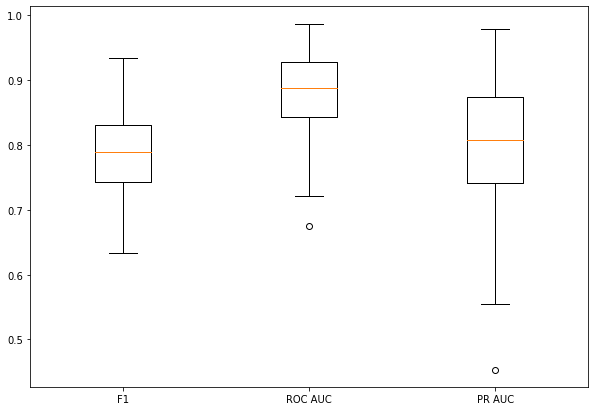

In [ ]:
#Figure 2
##############################################################################################
#F1, ROC-AUC, PR-AUC for various splits
#obtains the F1 score, ROC-AUC and PR-AUC values and charts for 100 runs of RF
##############################################################################################
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
ROCs = []
PRs = []
F1s = []
for state in range(500,5000,50):
    
    train_features, test_features, train_labels, test_labels= train_test_split(features, 
        label.values.ravel(), test_size = 0.2, random_state = state)

    rf_optimum = RandomForestClassifier()
    
    rf_optimum.fit(train_features, train_labels)
    probas = rf_optimum.predict_proba(test_features)
    #F1 score
    F1 = f1_score(test_labels, rf_optimum.predict(test_features), average='macro')
    F1s.append(F1)
    #ROC curve
    # get false and true positive rates
    fpr, tpr, thresholds = roc_curve(test_labels, probas[:,1])
    # get area under the curve
    roc_auc = auc(fpr, tpr)
    ROCs.append(roc_auc)
    
    #PR curve
    precision, recall, thresholds = precision_recall_curve(test_labels, probas[:,1])
    # average precision score
    avg_precision = average_precision_score(test_labels, probas[:,1])
    # precision auc
    pr_auc = auc(recall, precision)
    PRs.append(pr_auc)
    
fig = plt.figure(figsize =(10, 7)) 
  
# Creating plot 
ROC_PR_data = [F1s, ROCs, PRs]
plt.boxplot(ROC_PR_data, labels = ['F1','ROC AUC', 'PR AUC']) 
  
# show plot 
plt.show() 

In [ ]:
# create data for figure 2
ROC_PR_data = np.transpose(ROC_PR_data)
Fig_3_df = pd.DataFrame(ROC_PR_data, columns = ['F1','ROC AUC','PR AUC'])
Fig_3_df.to_excel('Pb in blood Fig 2 MA.xlsx')

Feature ranking:


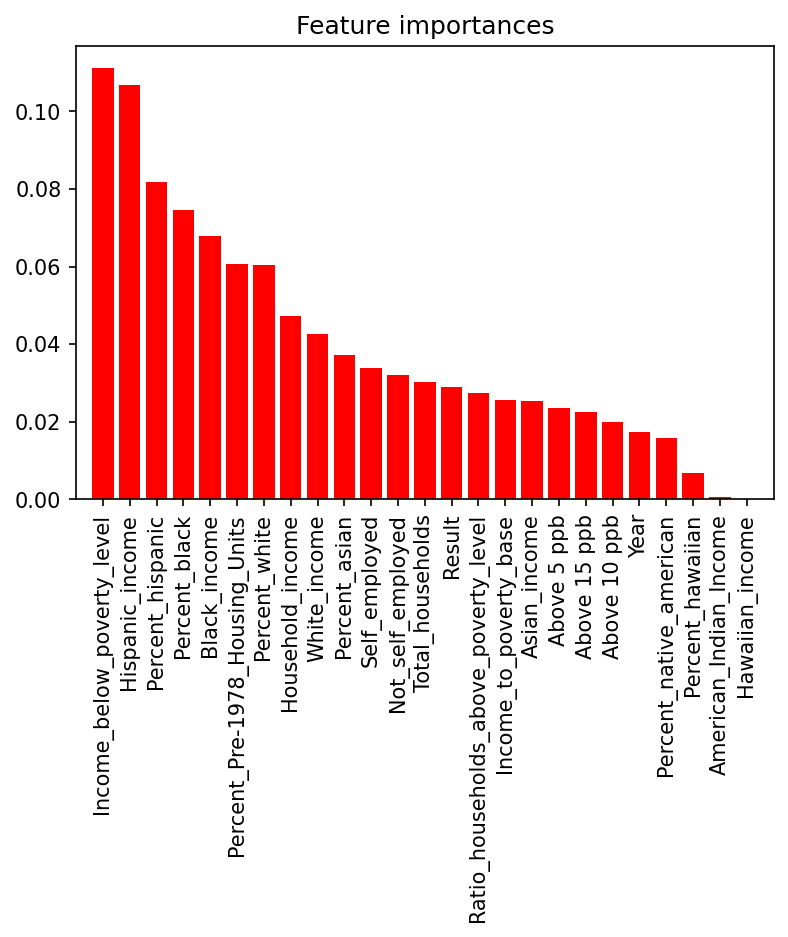

In [ ]:
##############################################################################################
#Feature importance analysis - Figure 3
#
##############################################################################################
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_head = features.columns
feature_head= feature_head[indices]
# Print the feature ranking
print("Feature ranking:")

# Plot the impurity-based feature importances of the forest
plt.figure(dpi=150)
plt.title("Feature importances")
plt.bar(range(train_features.shape[1]), importances[indices],
        color="r")
plt.xticks(range(train_features.shape[1]), feature_head, rotation='vertical')
plt.xlim([-1, train_features.shape[1]])
plt.show()

Feature_imp_data = [feature_head,importances[indices]]
Feature_imp_data = np.transpose(Feature_imp_data)
Fig_3_df = pd.DataFrame(Feature_imp_data, columns = ['Feature','Importance'])
Fig_3_df.to_excel('Pb in blood Fig 3 MA.xlsx')

F1: 0.9348484848484848
ROC AUC: 0.9872159090909092
PR AUC: 0.9676490176490178


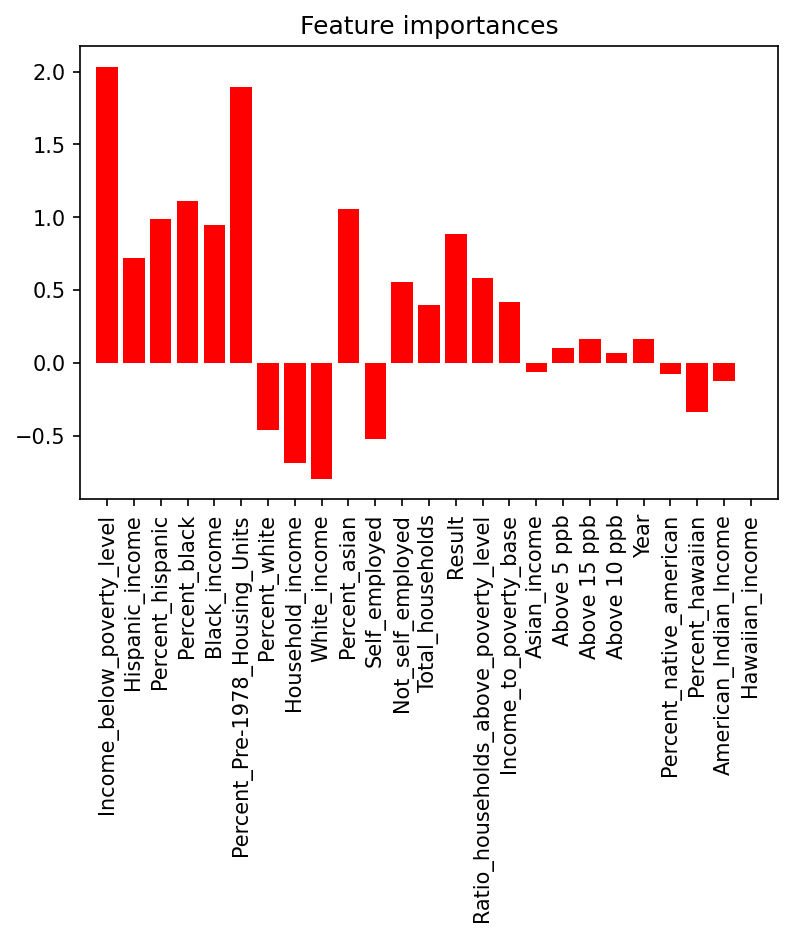

In [ ]:
##############################################################################################
#Logistic regression - Figure 4
#
##############################################################################################
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model = logit_model.fit(train_features, train_labels)

# Examine the coefficients
importances = logit_model.coef_
importances = np.array(importances)
importances= importances.flatten()
feature_head = features.columns
feature_head= feature_head[indices]

# Examine performance
F1 = f1_score(test_labels, rf_optimum.predict(test_features), average='macro')
fpr, tpr, thresholds = roc_curve(test_labels, probas[:,1])
roc_auc = auc(fpr, tpr)
precision, recall, thresholds = precision_recall_curve(test_labels, probas[:,1])
avg_precision = average_precision_score(test_labels, probas[:,1])
pr_auc = auc(recall, precision)
print('F1:', F1)
print('ROC AUC:', roc_auc)
print('PR AUC:', pr_auc)

# Plot the logistic regression coefficients
plt.figure(dpi=150)
plt.title("Feature importances")
plt.bar(range(train_features.shape[1]), importances[indices],
        color="r")
plt.xticks(range(train_features.shape[1]), feature_head, rotation='vertical')
plt.xlim([-1, train_features.shape[1]])
plt.show()

Feature_imp_data_log = [feature_head,importances[indices]]
Feature_imp_data_log = np.transpose(Feature_imp_data_log)
Fig_4_df = pd.DataFrame(Feature_imp_data_log, columns = ['Feature','Importance'])
Fig_4_df.to_excel('Pb in blood Fig 4 MA.xlsx')